# Preparación
Los ejercicios y prácticas de la asignatura de Análisis de Imágenes Biomédicas se realizarán en python. Para el procesado de imágenes se utilizarán las librerías numpy, OpenCV y scikit-image. 

Documentación:

- numpy: https://docs.scipy.org/doc/numpy-1.15.0/
- Opencv: https://docs.opencv.org/master/
- Scikit-image: http://scikit-image.org/


Se recomienda instalar las últimas versiones de las librerías disponibles en el gestor de paquetes pip (opencv 3.4.X, scikit-image 0.13.X, numpy >= 1.13).


## 1. Cargando librerías
Si la instalación se ha realizado con éxito, será posible cargar las librerías desde la consola python.


In [1]:
import cv2
import numpy as np
import skimage

Si aparece el error `ModuleNotFoundError: No module named 'xxxxx'` significa que el módulo `xxxxx`no ha podido cargarse, esto es, que la librería no está instalada correctamente en el sistema.

Nota: Para poder utilizar cualquier función de las librerías es necesario importarlas previamente en el terminal de python y en los ficheros de código. 


## 2. Matrices

Las imágenes en python se representan como matrices (arrays) con 2 o 3 dimensiones. La primera dimensión indica el número de filas; la segunda, el número de columnas y la tercera, el número de canales.

La gestión de arrays tanto en opencv como en scikit-image usa la librería numpy. En esta sección se mostrarán operaciones básicas con arrays en numpy.

Tutoriales adicionales: 

- https://numpy.org/doc/stable/user/quickstart.html

- https://scipy-lectures.org/intro/numpy/array_object.html

### Creación de arrays
Podemos crear un array indicando de forma manual los valores de cada celda:

In [2]:
a1 = np.array([1,2,3,4,5]) # Creación array unidimensional de tamaño 5
a2 = np.array([[1,2,3], [4,5,6]]) # Creación array bidimensional de tamaño 2x3
a3 = np.array([[[1,2,3], [4,5,6]], [[10,20,30], [40,50,60]]]) # Creación array tridimensional de tamaño 2x2x3

El atributo shape indica el tamaño del array:

In [3]:
print(a1.shape)
print(a2.shape)
print(a3.shape)

(5,)
(2, 3)
(2, 2, 3)


### Operaciones con arrays

En numpy podemos hacer operaciones básicas (+, - , * , /, > ,< , ==, ...) siempre que las dimensiones de los operadores sean adecuados. Podemos realizar estas mismas operaciones básicas entre escalares y matrices. También podemos aplicar funciones matemáticas (exp, sin, cos, sqrt,...) tanto a escalares como a matrices:

In [4]:
add1 = a1 + a1
diff = a2 - a2
mult_scalar = a3 * 3
print(add1)
print(diff)
print(mult_scalar)
print(np.sqrt(a1))
print(a1 == a1)
print(a2 > 4)

[ 2  4  6  8 10]
[[0 0 0]
 [0 0 0]]
[[[  3   6   9]
  [ 12  15  18]]

 [[ 30  60  90]
  [120 150 180]]]
[1.         1.41421356 1.73205081 2.         2.23606798]
[ True  True  True  True  True]
[[False False False]
 [False  True  True]]


### Acceso a posiciones 

El acceso a posiciones concretas de una matriz se realiza indicando los índices concretos entre corchetes (la primera posición es siempre 0). Es posible también seleccionar un rango en la matriz utilizando dos índices para indicar la posición inicial y final de dicho rango. Si no se indica el primer o el segundo índice en un rango, se considera la posición incial o final de la dimensión, respectivamente. Si se indica un índice negativo, la indexación comienza desde la última posición de la matriz. Si en un rango aparecen tres valores, el último valor indica el intervalo con el que se accede a las posiciones. Ejemplos:

In [5]:
print("a1[1] =>", a1[1])
print("a2[0,2] =>", a2[0,2])
print("a3[1,1,1] =>", a3[1,1,1])
print("a1[1:] =>", a1[1:]) # Desde la columna 1 hasta el final
print("a2[0,:] =>", a2[0,:]) # Fila 0, todas las columnas
print("a3[1, :, 1] =>", a3[1, :, 1]) # Canal 1, todas las filas, columna 1
print("a1[-1] =>", a1[-1])  # Última columna
print("a1[0:2:] =>", a1[0:5:2]) # Columnas 0, 2, 4

a1[1] => 2
a2[0,2] => 3
a3[1,1,1] => 50
a1[1:] => [2 3 4 5]
a2[0,:] => [1 2 3]
a3[1, :, 1] => [20 50]
a1[-1] => 5
a1[0:2:] => [1 3 5]


Es posible combinar estas indexaciones con operaciones básicas, por ejemplo:

In [6]:
a1[0:5:2] = 1111
print(a1)
a3[1,:,:] += a2  # Equivalente a a3[1,:,:] =  a3[1,:,:] + a2
print(a3)

[1111    2 1111    4 1111]
[[[ 1  2  3]
  [ 4  5  6]]

 [[11 22 33]
  [44 55 66]]]


### Otras operaciones de creación de arrays

Otras operaciones para la creación de matrices son:

In [7]:
z1 = np.zeros((3,4), dtype=np.float) # Creacion de una matriz de 3x4 con valores 0 de tipo float
o1 = np.ones((3,4), dtype=np.uint8) # Creación de una matriz de 3x4 con valores 1 de tipo uint8 (rango 0-255)
r1 = np.random.random((3,4)) # Creación de una matriz de 3x4 de valores aleatorios entre 0 y 1 de tipo float
e1 = np.empty((3,4)) # Creación de una matriz de 3x4 sin inicializar a ningún valor
print(r1.dtype)  # Tipo de la matriz
rg1 = np.arange(2,10) # Creación de una matriz con un rango de enteros entre 2 y 10
print(rg1, rg1.dtype)

float64
[2 3 4 5 6 7 8 9] int64


Nota: los tipos más habituales para trabajar con imágenes con uint8 (0-255) y las variantes de float (0.0-1.0).

### Manipulación de arrays

Algunas operaciones interesantes para la manipulación de arrays son:

In [8]:
z2 = z1.reshape(4,3) # Redimensionar una matriz
print(z2.shape)
r2 = r1.ravel() # Aplanar la matriz
print(r1.shape, r2.shape)
t1 = r1.transpose() # Matriz transpuesta
print(t1.shape)

(4, 3)
(3, 4) (12,)
(4, 3)


### Copia de matrices
Si asignamos una matriz a una variable, esa variable contiene una referencia a dicha matriz, esto es, no se crea una copia de la matriz. 

In [9]:
rg2 = rg1
print(rg1 is rg2)
rg3 = rg1[4:6]
rg1[5] = 1111
print(rg2[5])
print(rg3[1])


True
1111
1111


Si queremos crear una copia de la matriz, debemos utilizar la función copia:

In [10]:
rg2 = np.copy(rg1)
print(rg1 is rg2)
rg1[5] = 2222
print(rg2[5], rg1[5])

rg2 = rg1 * 1 # Multiplicar por 1 también genera una copia de la matriz
rg1[5] = 3333
print(rg2[5], rg1[5])

False
1111 2222
2222 3333


### Otras funciones


In [11]:
print(np.arange(0,5))# Crea un array con valores consecutivos entre 0 y 5
print(np.sum(a1))  # Sumatorio
print(np.sum(a2, axis=0)) # Sumatorio por filas
print(np.min(a2, axis=1)) # Minimo por columnas
print(np.max(a2)) # Maximo global 
index_max_flatten = np.argmax(a2) # Indice del valor maximo (considera array aplanado)
indices_max = np.unravel_index(index_max_flatten, a2.shape) # Convertir índice plano en índices de tipo (fila,columna)
print(index_max_flatten, indices_max)
ix,iy = np.where(a2>3) # Indices de las celdas de a2 que contienen valores mayores que 3
print(a2[ix,iy]) # Valores de a2 mayores que 3
print(a2>3) # Se genera una matriz en la que cada posicion es un booleano que indica si el valor de la matriz a2 es superior a 3
print(a2[a2>3]) # Valores de a2 mayores que 3
print(a1.dtype)
a4 = a1.astype(np.float) # Conversion de tipos
print(a4.dtype)

[0 1 2 3 4]
3339
[5 7 9]
[1 4]
6
5 (1, 2)
[4 5 6]
[[False False False]
 [ True  True  True]]
[4 5 6]
int64
float64


### Ejercicios
Trata de resolver todos los ejercicios sólo con operaciones sobre matrices, sin utilizar bucles.

1) Crea una matriz de tipo entero de tamaño 10x4 con valores entre 0 y 100.

a) Cuenta los valores mayores que 50.

b) Reemplaza los valores menores o iguales a 50 por 10.

c) Normaliza la matriz (para cada valor resta la media de la matriz y divide el resultado por la desviación estándar).

In [12]:
# Escribe aquí tu código...

2) Crea una matriz de tipo flotante de tamaño 30x30 con ceros.

a) Pon a 1 los bordes de la matriz.

b) Genera una matriz de tamaño 30x30x3 y copia la matriz de 30x30 en cada uno de los planos.

In [13]:
# Escribe aquí tu código...

3) Crea otra matriz de tipo entero de tamaño 10x4 con valores entre 0 y 100 y cuenta cuantas celdas tienen el mismo valor en la misma posición en la matriz del ejercicio 1. 

In [14]:
# Escribe aquí tu código...

## 3. Imágenes
En OpenCV existe la función imread que lee distintos tipos de formatos de imagen. El primer parámetro es el path absoluto o relativo a la imagen en el sistema de ficheros. Existe un segundo parámetro (opcional) con el que podemos indicar cómo queremos cargar la imagen, si en escala de grises (`cv2.IMREAD_GRAYSCALE`), en color (`cv2.IMREAD_COLOR`), o en el formato original de la imagen (`cv2.IMREAD_UNCHANGED`). Por defecto, las imágenes se cargan con su formato original.


In [15]:
im = cv2.imread("res/lena.png")
print(im.shape) # Tamaño de la imagen
print(im.dtype) # Tipo de la imagen

(512, 512, 3)
uint8


#### Ejercicio
Vuelve a leer la imagen utilizando el parámetro `CV2.IMREAD_GRAYSCALE` en la llamada a imread. Qué cambios se aprecian?

In [17]:
#im2 = # Completa el código

Las imágenes son matrices por lo que es posible realizar cualquier tipo de operación de las descritas en el apartado anterior con ellas:

In [18]:
print(im[100,100,1])
im[100:150, 200:250, :] = 100
print(np.sum(im), np.mean(im))

68
100329398 127.57542673746745


### Visualización de imágenes
La función `imshow` de OpenCV permite visualizar una imagen en una nueva ventana. El primer parámetro de esta función es una cadena de caracteres que sirve para identificar la ventana. El segundo parámetro es una imagen. Sólo son visualizables dos tipos de imágenes:
- Matrices de tipo uint8 con valores entre 0 y 255
- Matrices de tipo float con valores entre 0.0 y 1.0

Nota: Si tenemos una matriz de otro tipo y/o en otro rango de valores es necesario convertir dicha matriz a uno de los anteriores tipos y normalizar dicha matriz a los valores correspondientes al tipo seleccionado.

La función `waitKey` detiene la ejecución del código hasta que se pulse una tecla o pase un tiempo determinado. Si no llamamos a esta función tras imshow, el programa continuará su ejecución por lo que no se visualizará la imagen en la ventana.
Esta función tiene un parámetro opcional que es el número de segundo que queremos que espere. Si indicamos 0, el programa se detendrá indefinidamente hasta que pulsemos una tecla. Esta función devuelve el código ascii de la tecla que acabamos de pulsar, lo cual se puede utilizar para controlar la ejecución del programa.


In [19]:
cv2.imshow("win", im)
k = cv2.waitKey(0)
print (k)

-1


Las funciones `destroyWindow` y `destroyAllWindows` se utilizan para cerrar ventanas.

In [20]:
cv2.destroyWindow("win")
cv2.destroyAllWindows()

error: OpenCV(4.4.0) /tmp/pip-build-cfc0r5v7/opencv-python/opencv/modules/highgui/src/window_gtk.cpp:1260: error: (-215:Assertion failed) found && "Can't destroy non-registered window" in function 'cvDestroyWindow'


En este tutorial utilizaremos una alternativa para visualizar las imágenes que permite incrustar los resultados en el propia página en vez de abrir una nueva ventana. Esa alternativa de visualización utiliza el módulo `matplotlib`.

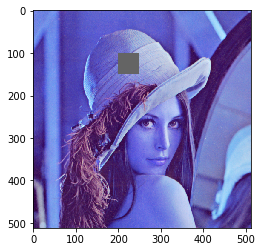

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(im)
plt.show()

Puedes eliminar los ejes de coordenadas llamando a la función `plt.axis('off')` antes de `plt.show()`.

#### Ejercicios

1) En OpenCV las imágenes RGB se cargan en BGR, por lo que el primer canal de la matriz es el azul y el tercero es el canal rojo. La función imshow de OpenCV muestra las imágenes correctamente pero la función imshow de la librería matplotlib no. Crea una nueva imagen en la que intercambies el primer y tercer canal y visualizala con `plt.imshow`.


2) Muestra los canales rojo, verde y azul de forma independiente. Usa `cmap='gray` como segundo parámetro de la función `plt.imshow` para mostrar cada canal en escala de grises.

In [22]:
#Escribe aquí tu código

### Salvar imágenes a disco

Para guardar imágenes a disco se puede utilizar la función `cv2.imwrite`. El primer parámetro de esta función es la ruta y el nombre de fichero a salvar. El segundo parámetro es la matriz a guardar

In [23]:
cv2.imwrite('res/save.jpg', im)

True

### Dibujar sobre imágenes
Existen funciones predefinidas en OpenCV para dibujar líneas, círculos y rectángulos. 

En las funciones de dibujo las coordenadas, al contrario que las matrices, se indican con formato (columna, fila).

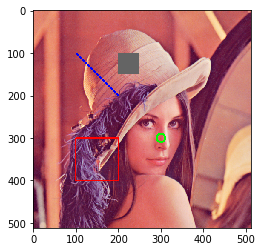

In [24]:
cv2.line(im, (100,100), (200,200), (255, 0, 0), 2) # imagen, punto inicial, punto final, color BGR, grosor
cv2.circle(im, (300,300), 10, (0,255,0), 3) # imagen, centro, radio, color BGR, grosor
cv2.rectangle(im, (100, 300), (200, 400), (0,0,255), 2)
plt.imshow(im[:,:,::-1]) # Truco para mostrar las imágenes correctamente! ;)
plt.show()

###  Ejercicios

1) Una forma habitual de trabajar en procesado de imagen es utilizar máscaras para extraer una región de interés de la imagen y descartar el resto de píxeles de la imagen. Una máscara es una matriz de ceros con unos en las posiciones que nos interesan.

  a) Define una máscara de 512x512 píxeles con una región de unos entre las filas 200 y 400 y las columnas 200 a 350. 

  b) Visualiza la máscara
  
  c) Aplica la máscara a la imagen en color `im` previamente cargada. *Hint*: multiplica la matriz de la máscara por cada uno de los canales de la imagen. 
  
  d) Visualiza el resultado de aplicar la máscara

In [25]:
# Escribe aquí tu código

2) Carga las imágenes `face1.jpg` y  `face2.jpg`. Visualízalas y fusiónalas utilizando operaciones aritméticas sobre matrices de forma que la imagen resultado sea:

a) El 25% de la primera imagen y el 75% de la segunda imagen

b) La media de las imágenes de entrada

c) El 75% de la primera imagen y el 25% de la segunda imagen

*Hint*: convierte las imágenes de entrada a float y normalízalas entre 0.0 y 1.0 para evitar errores de precisión al realizar la media.

In [26]:
face1 = cv2.imread('res/face1.jpg').astype(float)/255.0
face2 = cv2.imread('res/face2.jpg').astype(float)/255.0
# Completa el código